# 대규모 이미지 인식을 위한 고심층 컨볼루션 신경망(VGG16)

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# VGG16 신경망 정의
def VGG_16(weights_path=None):
    model = models.Sequential()ㅇㅇㅇ
    model.add(layers.ZeroPadding2D((1,1), input_shape=(224,224, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), (2,2)))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), (2,2)))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), (2,2)))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), (2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), (2,2)))
    
    model.add(layers.Flatten())
    
    # VGG망의 최상위 계층
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(.5))
    model.add(layers.Dense(1000, activation='softmax'))
    
    if weights_path:
        model.load_weights(weights_path)
    return model

[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]]


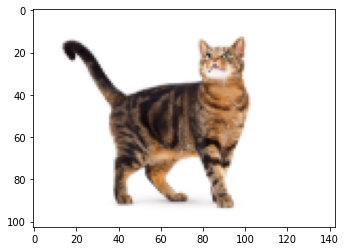

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

im = cv2.resize(cv2.imread('images/cat.jpg'), (224, 224)).astype(np.float32)
#im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)
print(im)

img = cv2.imread("images/cat.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
model = VGG_16('model/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
model.summary()
model.compile(optimizer='sgd', loss='categorical_crossentropy')
out = model.predict(im)
print(np.argmax(out))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_39 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_40 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_41 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 112, 112, 128)    

- 285 : 이집트 고양이
- https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

### VGG16망 내장 tf.keras 활용

predicted img index: 553


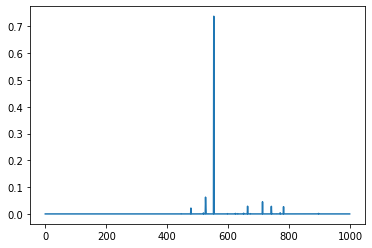

In [20]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 이미지넷(ImageNet)으로 사전 훈련된 사전 구축 모델
pre_model = VGG16(weights='imagenet', include_top=True)
pre_model.compile(optimizer='sgd', loss='categorical_crossentropy')

# VGG16에 훈련된 이미지 형식으로 조정
im = cv2.resize(cv2.imread('images/computer.jpeg'), (224,224)).astype(np.float32)
im = np.expand_dims(im, axis=0)

# 예측
out = pre_model.predict(im)
index = np.argmax(out)
print("predicted img index:",index)

plt.plot(out.ravel())
plt.show()

## 특징 추출을 위해 사전 구축된 딥러닝 모델(VGG16) 재활용

In [4]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

# 이미지넷에 사전 훈련된 가중치를 가진 사전 구출된 모델
base_model = VGG16(weights='imagenet', include_top=True)
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

0 input_3 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [11]:
# block4_pool 블록에서 특징 추출
model = models.Model(inputs=base_model.input,
                    outputs=base_model.get_layer('block4_pool').output)

img_path = 'images/cat.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape, x.dtype, x[0]

((1, 224, 224, 3),
 dtype('float32'),
 array([[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],
 
        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],
 
        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],
 
        ...,
 
        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.06

In [13]:
# 이 블록에서 특징 가져오기
features = model.predict(x)
print(features)

[[[[  0.         0.        39.12757  ...   0.         0.
      0.      ]
   [  0.         0.         0.       ...   0.       261.40982
      0.      ]
   [  0.         0.         0.       ...   0.       376.4143
      0.      ]
   ...
   [  0.         0.         0.       ...   0.       175.46504
      0.      ]
   [  0.         0.        32.008057 ...   0.         0.
      0.      ]
   [  0.         0.        76.2813   ...   0.         0.
      0.      ]]

  [[  0.         0.         0.       ...   0.        50.920372
      0.      ]
   [  0.         0.        44.453056 ...   0.       123.95481
      0.      ]
   [  0.         0.        27.892405 ...   0.       573.442
      0.      ]
   ...
   [  0.         0.         0.       ...   0.       683.4284
      0.      ]
   [  0.         0.         0.       ...   0.        18.347548
      0.      ]
   [  0.         0.        60.561672 ...   0.         0.
      0.      ]]

  [[  0.         0.        27.617815 ...   0.         0.
      0.   